In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
import os

pd.set_option("display.min_rows", 10)

In [2]:
quadro = ''

In [3]:
_dir = r"..\00_dados\0_dados_TR_DT_DC_PST_FP"
files = [file for file in os.listdir(_dir) if file.endswith(".csv")]
files

['dados_qgbt2_INPS0014.csv',
 'dados_qgbt3_INPS0013.csv',
 'dados_qgbt4_INPS0011.csv']

In [4]:
path = os.path.join(_dir, files[2])
path

'..\\00_dados\\0_dados_TR_DT_DC_PST_FP\\dados_qgbt4_INPS0011.csv'

In [5]:
df = pd.read_csv(path, sep=';', decimal=',', skiprows=37)
df = df.rename(columns={'DateTime': 'Tempo',
                        'MIN_A1[A][A]': 'Ia_min', 'MIN_A2[A][A]': 'Ib_min', 'MIN_A3[A][A]': 'Ic_min',
                        'AVG_A1[A][A]': 'Ia_avg', 'AVG_A2[A][A]': 'Ib_avg', 'AVG_A3[A][A]': 'Ic_avg',
                        'MAX_A1[A][A]': 'Ia_max', 'MAX_A2[A][A]': 'Ib_max', 'MAX_A3[A][A]': 'Ic_max',
                        'MIN_An[A][A]': 'In_min', 'AVG_An[A][A]': 'In_avg', 'MAX_An[A][A]': 'In_max'})
df["Tempo"] = pd.to_datetime(df["Tempo"], format="%Y/%m/%d %H:%M:%S")
df = df [['Tempo', 'Ia_min', 'Ib_min', 'Ic_min', 'In_min', 'Ia_avg', 'Ib_avg', 'Ic_avg', 'In_avg','Ia_max', 'Ib_max', 'Ic_max', 'In_max']]
df

,Tempo,Ia_min,Ib_min,Ic_min,In_min,Ia_avg,Ib_avg,Ic_avg,In_avg,Ia_max,Ib_max,Ic_max,In_max
0,2023-02-08 14:56:52,430.8,485.0,365.7,57.290,455.2,506.6,401.4,88.84,493.4,531.7,426.8,116.80
1,2023-02-08 15:06:52,394.7,443.6,346.2,59.780,434.6,470.5,359.8,104.90,460.4,505.7,399.5,127.90
2,2023-02-08 15:16:52,349.5,430.9,334.6,53.830,379.7,455.7,349.4,92.78,412.8,484.1,390.6,116.10
3,2023-02-08 15:26:52,342.2,398.3,316.7,52.190,365.8,440.9,341.5,86.00,403.0,493.8,390.2,117.50
4,2023-02-08 15:36:52,328.7,386.7,282.2,51.080,350.8,404.9,306.5,86.93,368.0,428.1,349.9,113.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,2023-02-16 15:16:52,251.0,303.3,220.0,52.340,289.4,351.5,262.8,81.62,343.5,389.0,333.1,119.30
1155,2023-02-16 15:26:52,211.5,279.5,165.9,57.400,243.1,314.4,208.4,87.66,284.9,352.0,272.6,136.80
1156,2023-02-16 15:36:52,219.5,236.4,192.1,4.866,244.0,274.0,211.6,54.75,292.3,316.0,240.5,97.32
1157,2023-02-16 15:46:52,254.9,279.8,180.0,17.070,277.8,306.6,238.5,56.89,314.3,352.2,280.0,110.10


In [6]:
(df == 0).sum()

Tempo     0
Ia_min    0
Ib_min    0
Ic_min    0
In_min    0
Ia_avg    0
Ib_avg    0
Ic_avg    0
In_avg    0
Ia_max    0
Ib_max    0
Ic_max    0
In_max    0
dtype: int64

# Definição Parâmetros

In [7]:
class Horario:
    def __init__(self, h_dia, h_ponta, h_noite, h_madrugada):
        self.H_DIA = h_dia
        self.H_PONTA = h_ponta
        self.H_NOITE = h_noite
        self.H_MADRUGADA = h_madrugada

Dia_util = Horario(dt.time(7, 0, 0), dt.time(18, 0, 0), dt.time(21, 0, 0), dt.time(23, 59, 59))  # Horarios do dia útil

In [8]:
dados_DC = df[0:1008].copy()
dados_DC['Dia_Semana'] = dados_DC['Tempo'].dt.weekday
dias_semana = {
    0: "Segunda-feira",
    1: "Terça-feira",
    2: "Quarta-feira",
    3: "Quinta-feira",
    4: "Sexta-feira",
    5: "Sábado",
    6: "Domingo"
}
dados_DC['Dia_Semana_PT_BR'] = dados_DC['Tempo'].dt.weekday.map(dias_semana)
########## Determina tipo de horário
dados_DC['Tipo_Hora'] = ['Dia' if (hora >= Dia_util.H_DIA) & (hora < Dia_util.H_PONTA) else
                         'Ponta' if (hora >= Dia_util.H_PONTA) & (hora < Dia_util.H_NOITE) else
                         'Noite' if (hora >= Dia_util.H_NOITE) & (hora < Dia_util.H_MADRUGADA) else
                         'Madrugada' for hora in dados_DC['Tempo'].dt.time]

dados_DC

,Tempo,Ia_min,Ib_min,Ic_min,In_min,Ia_avg,Ib_avg,Ic_avg,In_avg,Ia_max,Ib_max,Ic_max,In_max,Dia_Semana,Dia_Semana_PT_BR,Tipo_Hora
0,2023-02-08 14:56:52,430.8,485.0,365.7,57.29,455.2,506.6,401.4,88.84,493.4,531.7,426.8,116.8,2,Quarta-feira,Dia
1,2023-02-08 15:06:52,394.7,443.6,346.2,59.78,434.6,470.5,359.8,104.90,460.4,505.7,399.5,127.9,2,Quarta-feira,Dia
2,2023-02-08 15:16:52,349.5,430.9,334.6,53.83,379.7,455.7,349.4,92.78,412.8,484.1,390.6,116.1,2,Quarta-feira,Dia
3,2023-02-08 15:26:52,342.2,398.3,316.7,52.19,365.8,440.9,341.5,86.00,403.0,493.8,390.2,117.5,2,Quarta-feira,Dia
4,2023-02-08 15:36:52,328.7,386.7,282.2,51.08,350.8,404.9,306.5,86.93,368.0,428.1,349.9,113.2,2,Quarta-feira,Dia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2023-02-15 14:06:52,348.2,447.2,322.4,82.09,389.0,496.0,358.9,113.20,426.5,541.8,397.1,145.6,2,Quarta-feira,Dia
1004,2023-02-15 14:16:52,364.7,461.4,329.7,92.81,397.7,509.5,372.9,115.30,432.3,544.6,416.6,147.5,2,Quarta-feira,Dia
1005,2023-02-15 14:26:52,322.4,476.6,310.9,108.40,384.8,517.7,355.5,138.30,440.8,571.2,408.0,181.4,2,Quarta-feira,Dia
1006,2023-02-15 14:36:52,390.8,502.9,354.4,104.30,412.2,541.1,384.6,132.00,442.9,573.9,436.5,153.8,2,Quarta-feira,Dia


# Gráficos Corrente

Text(0.5, 0, 'Samples')

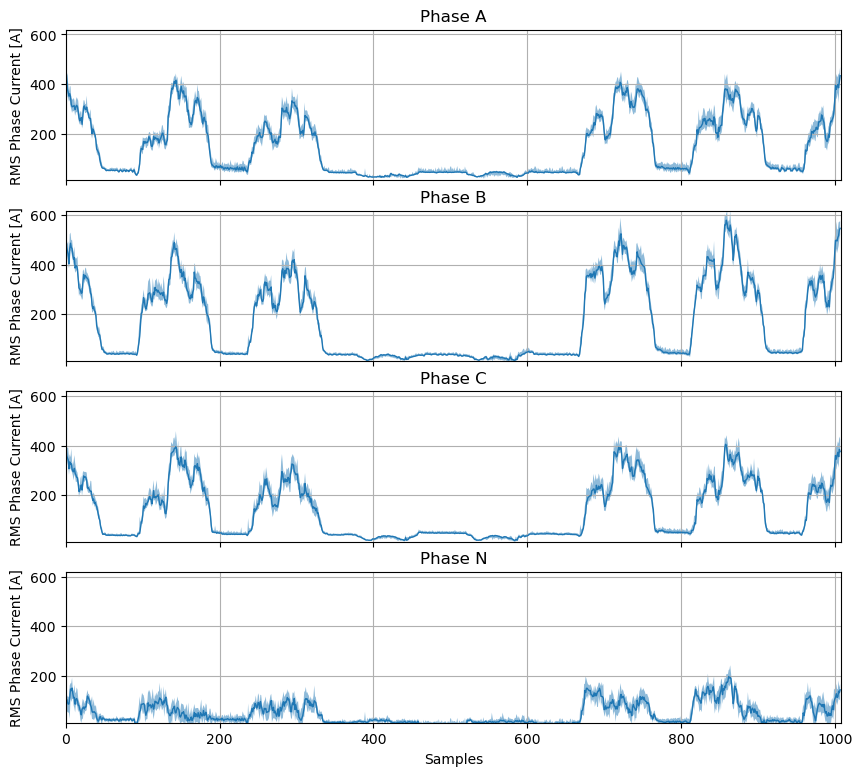

In [9]:
########## Gerar gráficos de tensão em regime permanente
Nsteps=1008
t=np.arange(Nsteps)
x=np.ones(Nsteps)

Y_grafico_max=max(max(dados_DC['Ia_max']),max(dados_DC['Ib_max']),max(dados_DC['Ic_max']))
Y_grafico_min=min(min(dados_DC['Ia_min']),min(dados_DC['Ib_min']),min(dados_DC['Ic_min']))

def edit_graf_tensao(grafico, V_max, V_min, V_avg, fase):
    grafico.grid(True)
    grafico.fill_between(t, V_max, V_min, alpha=.5, linewidth=0)
    grafico.plot(t, V_avg, linewidth=1)
    grafico.set_ylim([Y_grafico_min, Y_grafico_max])
    grafico.set_xlim([0, 1008])
    grafico.set_ylabel('RMS Phase Current [A]')
    grafico.set_title(f'Phase {fase}')
    
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10, 9))
edit_graf_tensao(ax1, dados_DC['Ia_max'], dados_DC['Ia_min'], dados_DC['Ia_avg'], 'A')
edit_graf_tensao(ax2, dados_DC['Ib_max'], dados_DC['Ib_min'], dados_DC['Ib_avg'], 'B')
edit_graf_tensao(ax3, dados_DC['Ic_max'], dados_DC['Ic_min'], dados_DC['Ic_avg'], 'C')
edit_graf_tensao(ax4, dados_DC['In_max'], dados_DC['In_min'], dados_DC['In_avg'], 'N')
ax4.set_xlabel('Samples')

In [10]:
np.percentile(dados_DC['In_max'], 95)

np.float64(164.855)

In [11]:
# Ia_max
df['In_max'].max()

242.9

# Calculo delta de Corrente

$$
{\Large
\Delta I_i
= \max\{\text{Ia}_i,\,\text{Ib}_i,\,\text{Ic}_i\}
- \min\{\text{Ia}_i,\,\text{Ib}_i,\,\text{Ic}_i\}
\qquad (i=1,\dots,n)
}
$$


In [12]:
def adicionar_maior_variacao(df: pd.DataFrame, col_a: str, col_b: str, col_c: str, nova_col: str) -> pd.DataFrame:
    arr = df[[col_a, col_b, col_c]].to_numpy(dtype=float)
    df[nova_col] = np.nanmax(arr, axis=1) - np.nanmin(arr, axis=1)
    return df


In [13]:
dados_DC = adicionar_maior_variacao(dados_DC, 'Ia_min', 'Ib_min', 'Ic_min', 'Delta_Imin')
dados_DC = adicionar_maior_variacao(dados_DC, 'Ia_avg', 'Ib_avg', 'Ic_avg', 'Delta_Iavg')
dados_DC = adicionar_maior_variacao(dados_DC, 'Ia_max', 'Ib_max', 'Ic_max', 'Delta_Imax')
dados_DC

,Tempo,Ia_min,Ib_min,Ic_min,In_min,Ia_avg,Ib_avg,Ic_avg,In_avg,Ia_max,Ib_max,Ic_max,In_max,Dia_Semana,Dia_Semana_PT_BR,Tipo_Hora,Delta_Imin,Delta_Iavg,Delta_Imax
0,2023-02-08 14:56:52,430.8,485.0,365.7,57.29,455.2,506.6,401.4,88.84,493.4,531.7,426.8,116.8,2,Quarta-feira,Dia,119.3,105.2,104.9
1,2023-02-08 15:06:52,394.7,443.6,346.2,59.78,434.6,470.5,359.8,104.90,460.4,505.7,399.5,127.9,2,Quarta-feira,Dia,97.4,110.7,106.2
2,2023-02-08 15:16:52,349.5,430.9,334.6,53.83,379.7,455.7,349.4,92.78,412.8,484.1,390.6,116.1,2,Quarta-feira,Dia,96.3,106.3,93.5
3,2023-02-08 15:26:52,342.2,398.3,316.7,52.19,365.8,440.9,341.5,86.00,403.0,493.8,390.2,117.5,2,Quarta-feira,Dia,81.6,99.4,103.6
4,2023-02-08 15:36:52,328.7,386.7,282.2,51.08,350.8,404.9,306.5,86.93,368.0,428.1,349.9,113.2,2,Quarta-feira,Dia,104.5,98.4,78.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2023-02-15 14:06:52,348.2,447.2,322.4,82.09,389.0,496.0,358.9,113.20,426.5,541.8,397.1,145.6,2,Quarta-feira,Dia,124.8,137.1,144.7
1004,2023-02-15 14:16:52,364.7,461.4,329.7,92.81,397.7,509.5,372.9,115.30,432.3,544.6,416.6,147.5,2,Quarta-feira,Dia,131.7,136.6,128.0
1005,2023-02-15 14:26:52,322.4,476.6,310.9,108.40,384.8,517.7,355.5,138.30,440.8,571.2,408.0,181.4,2,Quarta-feira,Dia,165.7,162.2,163.2
1006,2023-02-15 14:36:52,390.8,502.9,354.4,104.30,412.2,541.1,384.6,132.00,442.9,573.9,436.5,153.8,2,Quarta-feira,Dia,148.5,156.5,137.4


# Calculo Fator de Desequilibrio

$$
{\Large I_{\text{trafo}} = \frac{500000}{\sqrt{3}\,380}}
$$


In [14]:
Itrafo = 500000/(np.sqrt(3)*380)
Itrafo

np.float64(759.671406828455)

$$
{\Large
\text{FD}_i = \frac{\Delta I_i}{I_{\text{trafo}}}
}
$$


In [15]:
dados_DC['FD_min'] = dados_DC['Delta_Imin']/Itrafo
dados_DC['FD_avg'] = dados_DC['Delta_Iavg']/Itrafo
dados_DC['FD_max'] = dados_DC['Delta_Imax']/Itrafo
dados_DC

,Tempo,Ia_min,Ib_min,Ic_min,In_min,Ia_avg,Ib_avg,Ic_avg,In_avg,Ia_max,...,In_max,Dia_Semana,Dia_Semana_PT_BR,Tipo_Hora,Delta_Imin,Delta_Iavg,Delta_Imax,FD_min,FD_avg,FD_max
0,2023-02-08 14:56:52,430.8,485.0,365.7,57.29,455.2,506.6,401.4,88.84,493.4,...,116.8,2,Quarta-feira,Dia,119.3,105.2,104.9,0.157042,0.138481,0.138086
1,2023-02-08 15:06:52,394.7,443.6,346.2,59.78,434.6,470.5,359.8,104.90,460.4,...,127.9,2,Quarta-feira,Dia,97.4,110.7,106.2,0.128213,0.145721,0.139797
2,2023-02-08 15:16:52,349.5,430.9,334.6,53.83,379.7,455.7,349.4,92.78,412.8,...,116.1,2,Quarta-feira,Dia,96.3,106.3,93.5,0.126765,0.139929,0.123080
3,2023-02-08 15:26:52,342.2,398.3,316.7,52.19,365.8,440.9,341.5,86.00,403.0,...,117.5,2,Quarta-feira,Dia,81.6,99.4,103.6,0.107415,0.130846,0.136375
4,2023-02-08 15:36:52,328.7,386.7,282.2,51.08,350.8,404.9,306.5,86.93,368.0,...,113.2,2,Quarta-feira,Dia,104.5,98.4,78.2,0.137559,0.129530,0.102939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2023-02-15 14:06:52,348.2,447.2,322.4,82.09,389.0,496.0,358.9,113.20,426.5,...,145.6,2,Quarta-feira,Dia,124.8,137.1,144.7,0.164282,0.180473,0.190477
1004,2023-02-15 14:16:52,364.7,461.4,329.7,92.81,397.7,509.5,372.9,115.30,432.3,...,147.5,2,Quarta-feira,Dia,131.7,136.6,128.0,0.173364,0.179815,0.168494
1005,2023-02-15 14:26:52,322.4,476.6,310.9,108.40,384.8,517.7,355.5,138.30,440.8,...,181.4,2,Quarta-feira,Dia,165.7,162.2,163.2,0.218121,0.213513,0.214830
1006,2023-02-15 14:36:52,390.8,502.9,354.4,104.30,412.2,541.1,384.6,132.00,442.9,...,153.8,2,Quarta-feira,Dia,148.5,156.5,137.4,0.195479,0.206010,0.180868


# Calcular Percentils 

$$
{\Large
L_k=\left[\,(n-1)\cdot\frac{k}{100}\,\right]+1
}
$$


In [16]:
p95_fd_min = np.percentile(dados_DC['FD_min'], 95)
p95_fd_avg = np.percentile(dados_DC['FD_avg'], 95)
p95_fd_max = np.percentile(dados_DC['FD_max'], 95)

[p95_fd_min, p95_fd_avg, p95_fd_max]

[np.float64(0.1995007297072368),
 np.float64(0.199691601706231),
 np.float64(0.2042791114751579)]

# Piores Casos

In [17]:
valor_max_min = dados_DC['FD_min'].max()
valor_max_avg = dados_DC['FD_avg'].max()
valor_max_max = dados_DC['FD_max'].max()

[valor_max_min, valor_max_avg, valor_max_max]

[0.3065799211429215, 0.2768302164721184, 0.3060533776974207]

# Gráficos

In [18]:
def plot_lollipop(
    df: pd.DataFrame,
    y_col: str,
    weekday_col: str,
    figsize: Tuple[float, float] = (16, 4),
    dpi: int = 300,
    y_lim: Tuple[float, float] = (0, 0.35),
    desenhar_limites: bool = True,
    sombrear_alternados: bool = True,
    linha_const_valor: float = None,  
    linha_const_nome: str = "p95_fd_min",  
):
    """
    Plota um gráfico "lollipop" e adiciona um segundo índice no topo (eixo X)
    com os intervalos dos dias da semana definidos por outra coluna do DataFrame.

    Parâmetros
    ----------
    ...
    linha_const_valor : float ou None, opcional
        Se informado, desenha uma linha horizontal vermelha nesse valor.
    linha_const_nome : str ou None, opcional
        Rótulo (nome) exibido na legenda para a linha horizontal.
    """

    n = len(df)
    if n == 0:
        raise ValueError("DataFrame vazio.")

    # Eixo X = índice sequencial das amostras
    x = np.arange(n)

    # Série Y
    y = pd.to_numeric(df[y_col], errors="coerce").to_numpy()

    # Coluna com dias da semana (como string)
    wd = df[weekday_col].astype(str).to_numpy()

    # --- Plot base (lollipop) ---
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    ax.vlines(x, 0, y, linewidth=0.3)  # “hastes” finas
    ax.scatter(x, y, s=5)              # pontos no topo

    ax.set_xlabel("Numero da Amostra", fontsize=16)
    ax.set_ylabel(str(y_col), fontsize=16)

    if y_lim is not None:
        ax.set_ylim(*y_lim)

    ax.grid(True, axis="y", linewidth=0.3, alpha=0.5)

    # --- Linha horizontal constante (opcional) ---
    if linha_const_valor is not None:
        ax.axhline(y=linha_const_valor, color="red", linewidth=1,
                   label=str(linha_const_nome) if linha_const_nome else None)
        if linha_const_nome:
            ax.legend(loc="upper right", fontsize=9, frameon=False)

    # --- Cálculo dos intervalos (quando o dia da semana muda) ---
    if n > 1:
        change_idx = np.where(wd[1:] != wd[:-1])[0] + 1
    else:
        change_idx = np.array([], dtype=int)

    starts = np.r_[0, change_idx]
    ends = np.r_[change_idx, n]
    mids = (starts + ends - 1) / 2.0
    labels = [wd[s] for s in starts]

    # --- Eixo superior com rótulos dos dias ---
    ax_top = ax.twiny()
    ax_top.set_xlim(ax.get_xlim())
    ax_top.set_xticks(mids)
    ax_top.set_xticklabels(labels, fontsize=12)
    ax_top.xaxis.set_ticks_position("top")
    ax_top.tick_params(axis="x", which="both", length=0, pad=6)
    ax_top.set_xlabel("Dias da Semana", fontsize=16, labelpad=8)

    # Linhas de limite entre os dias (opcional)
    if desenhar_limites and len(change_idx) > 0:
        for idx in change_idx:
            ax.axvline(idx, linestyle="--", linewidth=0.5, alpha=0.5)

    # Sombreamento alternado de blocos (opcional)
    if sombrear_alternados:
        for i, (s, e) in enumerate(zip(starts, ends)):
            if i % 2 == 0:
                ax.axvspan(s - 0.5, e - 0.5, alpha=0.06)

    plt.tight_layout()
    return fig, ax, ax_top


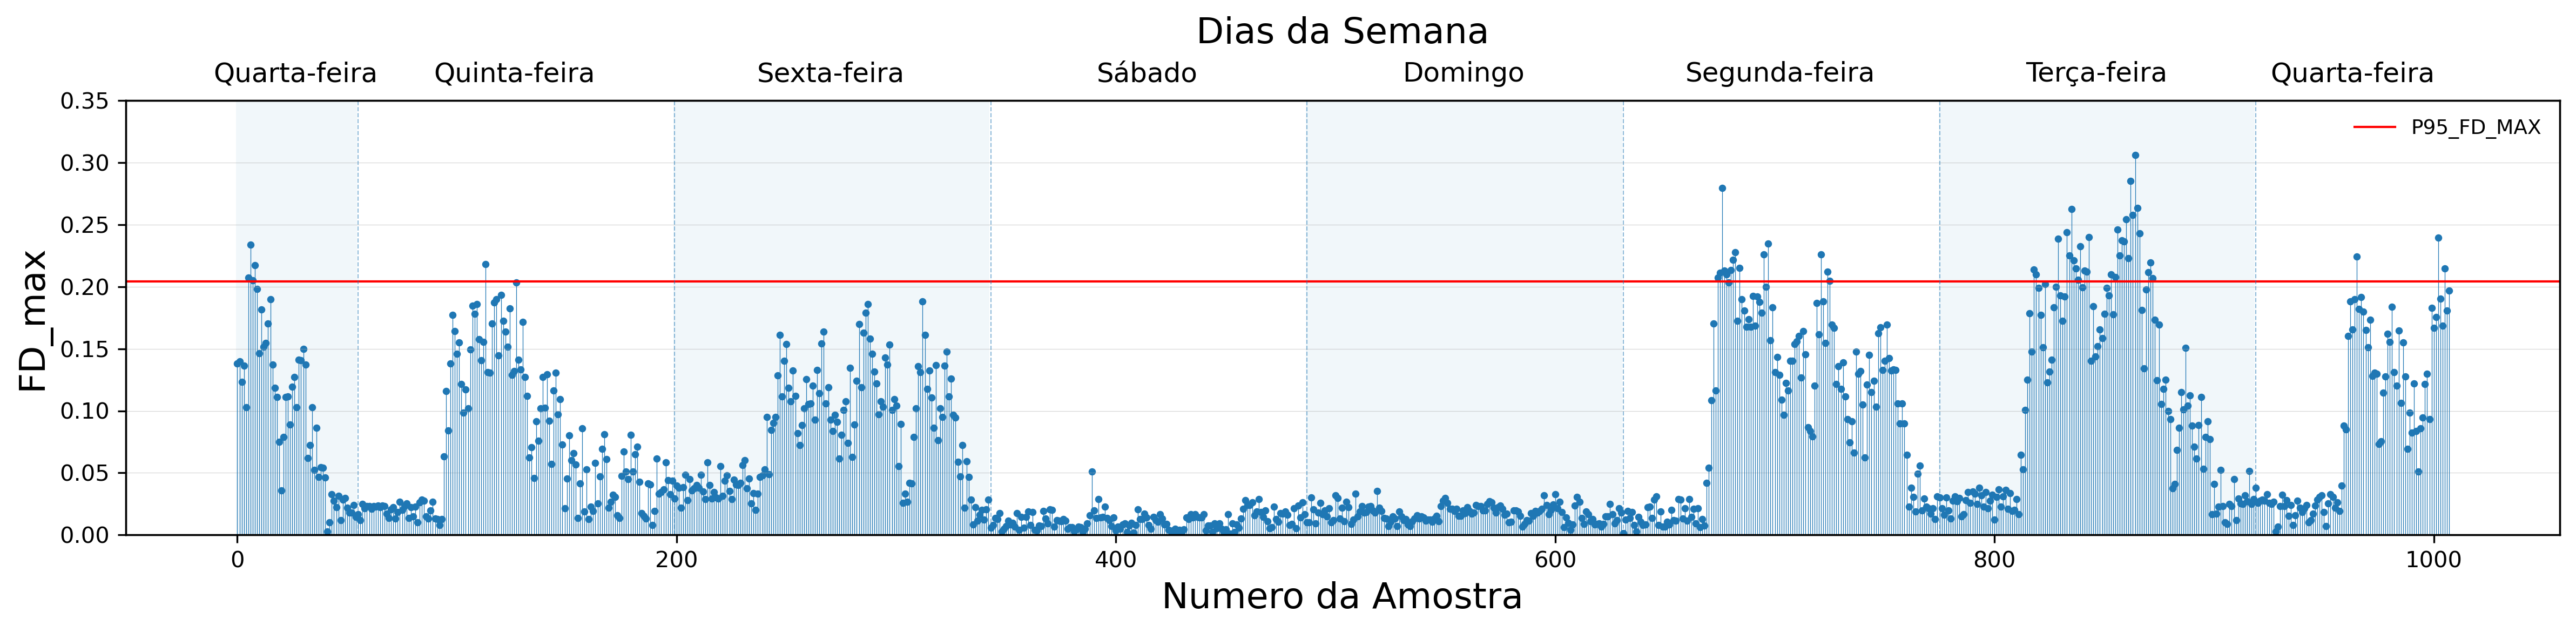

In [19]:
#fig = plot_lollipop(dados_DC, 'FD_min', 'Dia_Semana_PT_BR', linha_const_valor=p95_fd_min, linha_const_nome='p95_fd_min')
#fig = plot_lollipop(dados_DC, 'FD_avg', 'Dia_Semana_PT_BR', linha_const_valor=p95_fd_avg, linha_const_nome='p95_fd_avg')
fig = plot_lollipop(dados_DC, 'FD_max', 'Dia_Semana_PT_BR', linha_const_valor=p95_fd_max, linha_const_nome='P95_FD_MAX')
plt.show()

# Gráficos Pizza

In [20]:
def criar_grafico_pizza_tipo_hora(df, coluna, coluna_flag, valor_limite, quadro=''):
    # Cria/atualiza coluna Flag
    df[coluna_flag] = np.where(df[coluna] > valor_limite, 1, 0)

    mask = df[coluna_flag].eq(1)

    # Conta ocorrências por Tipo_Hora (mantendo NaN se houver)
    counts = df.loc[mask, "Tipo_Hora"].value_counts(dropna=False).sort_index()

    if counts.sum() == 0:
        print(f"Não há registros com {coluna} > {valor_limite} para plotar.")
        return

    valores = counts.values
    total = valores.sum()

    # Oculta rótulo quando valor é zero
    rotulos = [str(lbl) if v > 0 else '' for lbl, v in zip(counts.index.astype(str), valores)]

    # Oculta "0.0%" quando o valor absoluto é 0
    def _autopct(pct):
        absoluto = pct * total / 100.0
        return "" if absoluto <= 0 else f"{pct:.1f}%"

    fig, ax = plt.subplots()
    ax.pie(
        valores,
        labels=rotulos,
        autopct=_autopct,
        startangle=90
    )
    ax.set_title(f"{coluna} > {valor_limite} por horário do dia")
    ax.axis("equal")  # pizza circular

    # opcional: exibir na tela (pode comentar se não quiser exibir ao criar)
    # plt.show()

    if quadro:
        nome = f"{quadro}_{coluna}_limite{valor_limite}_grafico_pizza_tipo_hora.png"
        fig.savefig(nome, dpi=300, bbox_inches="tight")

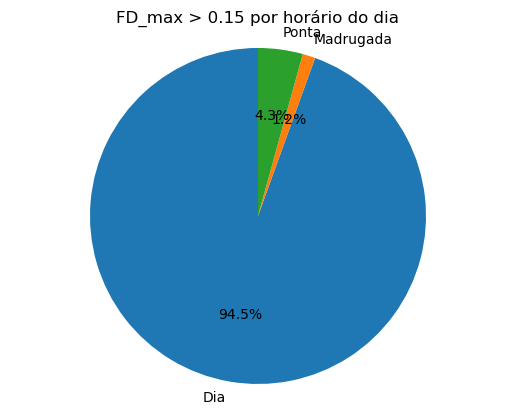

In [24]:
# criar_grafico_pizza_tipo_hora(dados_DC, 'FD_min', 'flag_FD_min', 0.2, quadro)
# criar_grafico_pizza_tipo_hora(dados_DC, 'FD_avg', 'flag_FD_avg', 0.2, quadro)
criar_grafico_pizza_tipo_hora(dados_DC, 'FD_max', 'flag_FD_max', 0.15, quadro)

In [22]:
def criar_grafico_pizza_dia_semana(df, coluna, coluna_flag, valor_limite, quadro=''):
    # ordem desejada (PT-BR)
    ordem = [
        "Segunda-feira", "Terça-feira", "Quarta-feira",
        "Quinta-feira", "Sexta-feira", "Sábado", "Domingo"
    ]

    # Cria/atualiza coluna Flag
    df[coluna_flag] = np.where(df[coluna] > valor_limite, 1, 0)

    # Filtra os registros com flag == 1
    mask = df[coluna_flag].eq(1)

    # Converte para categórico ordenado e conta
    s = df.loc[mask, "Dia_Semana_PT_BR"].astype(
        pd.CategoricalDtype(categories=ordem, ordered=True)
    )
    counts = s.value_counts(dropna=False, sort=False)

    if counts.sum() == 0:
        print(f"Não há registros com {coluna} > {valor_limite} para plotar.")
        return

    # Valores e rótulos, ocultando o índice quando o valor é zero
    valores = counts.values
    rotulos = [str(lbl) if v > 0 else '' for lbl, v in zip(counts.index.astype(str), valores)]

    # Função autopct que oculta "0.0%" (quando valor absoluto é 0)
    total = valores.sum()
    def _autopct(pct):
        # calcula o valor absoluto correspondente a pct
        absoluto = pct * total / 100.0
        return "" if absoluto <= 0 else f"{pct:.1f}%"

    fig, ax = plt.subplots()
    ax.pie(
        valores,
        labels=rotulos,
        autopct=_autopct,
        startangle=90
    )
    ax.set_title(f"{coluna} > {valor_limite} por Dia da Semana")
    ax.axis("equal")  # pizza circular

    if quadro:
        nome = f"{quadro}_{coluna}_limite{valor_limite}_grafico_pizza_dia_semana.png"
        fig.savefig(nome, dpi=300, bbox_inches="tight")


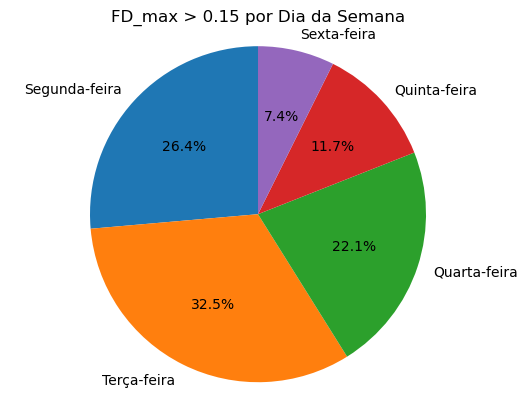

In [25]:
# criar_grafico_pizza_dia_semana(dados_DC, 'FD_min', 'flag_FD_min', 0.2, quadro)
# criar_grafico_pizza_dia_semana(dados_DC, 'FD_avg', 'flag_FD_avg', 0.2, quadro)
criar_grafico_pizza_dia_semana(dados_DC, 'FD_max', 'flag_FD_max', 0.15, quadro)